# Tutorial on Matrix Product States for Generative Learning
[Pan Zhang](http://lib.itp.ac.cn/html/panzhang/)  
Institute of Theoretical Physics, Chinese Academy of Sciences  
Reference: Z. Han, J. Wang, H. Fan, L. Wang and P. Zhang, [arXiv:1709.01662](https://arxiv.org/abs/1709.01662)   (to appear in *Phys. Rev. X* )  
Date: 06.11.2018

_Abstract_:  
Generative modeling is an important task in machine learning and artificial intelligence. It asks to learn joint probability distribution from training data and generates samples according to it. Many models have been proposed for generative modeling. In this tutorial, we introuduce a new model that is inspired by probabilistic interpretation of quantum physics, which we call _Born Machine_. In particular we introduce a generative model using matrix product states, which is a tensor network originally proposed for describing (particularly one-dimensional) entangled quantum states. The model enjoys efficient learning by utilizing the density matrix renormalization group method, and offers an efficient direct sampling for generative tasks. 

The tutorial contains three parts: 
1. An introducion to tensor networks and matrix product states (tensor train format).
2. An Introducion to generative modeling, and how to do this using matrix product states.
3. In the last part I will give simple python code for training a MPS.

## 1.   An mini introduction to tensor networks and matrix product states
### 1.1 Data and tensors
<img src="tensor.png", width=150>
* Data can be expressed (or mapped to) as a vector in a Hilbert space $\mathcal {H}$ of dimension $n$. Different mappings result to different spaces.
* Linear opearations in the space $\mathcal{H}$ can be expressed by an operator. Linear operators in ab high-dimensional space correpond to non-linear operators in a low-dimensional space: Kernel methods, representer theorem.
* In practice, we use **tensors** (multi-way arrays) to represent both operators and vectors.
* **Curse of dimensionality** $\Longleftrightarrow$ A large effective dimension $\Longleftrightarrow$ Tensors contain too many elements
* Low-dimensional approximation to a tensor $\Longleftrightarrow$ Compression of the Hilbert space $\Longleftrightarrow$ **Tensor networks**

### 1.2  Applications of tensor networks
* Tensor networks and graphical models: tensor contractions correpond to summation (or integration) of hidden (i.e. latent) variables
* In Physics, tensor networks are used for
  * expressing a wave function, by contracting virtual indices.
  * expressing the partition function of a classic system, by contracting all indices.
* In Applied Mathematics, tensor networks are used for 
  * fitting a function or another tensor
  * Data compression
* In Machine Learning (new), tensor networks are used for
  * predicting unknown elements of a tensor using known its known elements.
  * As a classifier
  * Generative model via Born's rule (the topic of this tutorial)
  
  A biased conclusion: **Optimization** in physics, **Fitting** in applied mathematics, and **Generalization** in machine learning.

### 1.3  Tensor Networks (Tensor decompositions)
#### 1.3.1 Tensor diagrams
<img src="tensor_diagram.png",width="700px" />

#### 1.3.2 Rank-1 tensors: product states
* The simplest tensor network: rank-one tensor, or factorized state, or factorized pure state. The number of elemens is proportional to the number of mode. The different modes are _independent_.
  * A qubit has two eigen states:
    * The first eigen state (analogous to pixel _black_) is expressed as    $| {\uparrow   } \rangle =|0\rangle=\left(\begin{matrix}1\\0\end{matrix}\right)$, 
    * The second eigen state (analogous to pixel _white_) is expressed as $|{\downarrow }\rangle=|1\rangle=\left(\begin{matrix}0\\1\end{matrix}\right)$，
    * A pixel with gray level $0.8$ can be expressed as $|\Psi\rangle=\sqrt{0.8}|{\uparrow }\rangle+\sqrt{0.2}|{\downarrow }\rangle=\left(\begin{matrix}\sqrt{0.8}\\\sqrt{0.2}\end{matrix}\right)$
* Product of two qubits: $|\Psi\rangle =|{\uparrow }\rangle|{\downarrow }\rangle=\left(\begin{matrix}1\\0\end{matrix}\right)\otimes \left(\begin{matrix}0\\1\end{matrix}\right)=\left(\begin{matrix}0\\1\\0\\0\end{matrix}\right)=\left(\begin{matrix}0&0\\1&0\end{matrix}\right)$  <img src="two_qubits.png",width="120px" />
* Product of two qubits: $|\Psi\rangle =|{\uparrow }\rangle\left(\frac{1}{\sqrt{2}}|{\uparrow }\rangle+\frac{1}{\sqrt{2}}|{\downarrow }\rangle\right)$
* Rank-one tensor can be used to fit any tensor i.e. extracting _key_ information of the tensor.  However the error could be very large, as the number of parameters in the rank-one tensor is very limited, hence rank-one tensor has very _limited representation power_. Consider a general system with $n$ qubits, it has $2^{n}-1$ free parameters, its rank-one fitting contains only $2n$ free parameters.
<img src="rank_one.png",width="550px" />
* Generalization of rank-one tensor: $n$ denotes number of modes, $d$ denotes local dimension, and $r$ denotes rank
  * CP decomposition，Canonical rank, number of parameters $ndr$
  * Tucker decomposition, number of parameters $ndr+r^n$
  * Tensor product states, also knon as _Tensor Train_, number of parameters $ndr^2$

#### 1.3.3 Tensors with rank $> 1$: entangled states
* Non-factorized pure states:
  * entanglement state of two qubits:   $\frac{1}{\sqrt{2}}|{\uparrow }\rangle|{\downarrow }\rangle-\frac{1}{\sqrt{2}}|{\downarrow }\rangle|{\uparrow }\rangle $, it can not be written as product state in any basis. The entanglements come from (anti) correlations.
  * EPR pair:    $\frac{1}{\sqrt{2}}|{\uparrow }\rangle|{\uparrow }\rangle+\frac{1}{\sqrt{2}}|{\downarrow }\rangle|{\downarrow }\rangle $, what is its rank?
  * $|\textrm{GHZ}\rangle=\frac{1}{\sqrt{2}}\left( |{\uparrow }\rangle^{\otimes n}+ | {\downarrow }\rangle^{\otimes n}\right)$
  
* Rank and engtanglement:
 * Rank-one $\Longleftrightarrow$ no entanglments
 * Larger rank, more enganglements. Quantitatively characterized by _entanglement entropy_.
 * Entanglments mean that some information of the system is shared by two qubits. Looking at one isolated qubit looses information!
 * Unfold a tensor into a <math>2\times 2</math>matrix, rank is the number of non-zero singular values of the matrix. It is also equivalent to the number of non-zero eigenvalues of the _reduced density matrix_.
 * Why SVD? Because SVD = Schmidt decomposition, a natural orthogonal bisection method!
 * How to determine whether there are engantlements between two sub-systems of a system with multiple (say $7$) qubits?
   * The same principle: unfoled the size-$2^7$ tensor to a matrix of size $2^3\times 2^4$, then look at its rank.
   * Squared singular values of this matrix ＝eigenvalues of the reduced density matrix.
   * Recall the definition of singular values: it is actually equivalent to find eigenvalues of the related covariance matrix.
   * There are many methods for unfolding this size-$2^7$ tesor, each of which corresponds to different _permute_$\to$_reshape_ operations. If we can do this for any tensor (with unlimited memory and computational power), it gives exact estimate of entaglement entropy, as well as the bond dimension of DMRG.
   * A quick test: is $|\Psi\rangle=\frac{1}{ {2}}|{\uparrow }\rangle|{\uparrow }\rangle+\frac{1}{ {2}}|{\downarrow }\rangle|{\downarrow }\rangle+\frac{1}{ {2}}|{\uparrow }\rangle|{\downarrow }\rangle+\frac{1}{ {2}}|{\downarrow }\rangle|{\uparrow }\rangle$ entangled?

* Entanglment entropy
  * The entanglement entropy defined on eigenvalues of the reduced density matrix.
  * The density matrix $\rho=|\Psi\rangle\langle\Psi|$ of pure state $\Psi$ is rank-1.
  * Whether the reduced density matrix $\rho_A=\textrm{Tr}_B|\Psi\rangle\langle\Psi|$ has rank larger than $1$ depends on whether sub-system A is entangled with sub system B.
  * $\psi_{AB}$ is a matrix obtained by unfolding tensor $\Psi$, and $\rho_A=\psi_{AB}\psi_{AB}^\dagger$. Thus rank of $\rho_A$ equals $\rho_B$, which is also identical to rank of $\psi_{AB}$.
  * Eigenvalues of $\rho_A$ are coinside with eigenvalues of $\rho_B$, which are identical to squared singular values of $\psi_{AB}$.
  * Entanglement entropy is defined as $S(\rho_A)=S(U\rho_A U^\dagger)=S(P(\{\lambda_i\}))=\sum_i\lambda_i\log(\lambda_i)$, where U is a (column-orthogonal) unitary matrix, $P(\{\lambda_i)\}$ denotes distribution of eigenvalues of the reduced density matrix.

## 2.   An introduction to generative modeling using matrix product states

## 3. A simple implementation of MPS Born Machine

In [20]:
import sys
import numpy as np
import torch
import math
%matplotlib inline
import matplotlib.pyplot as plt

torch.manual_seed(1) # Fix seed of the random number generators
np.random.seed(1)

The function below is used to plot mnist images

In [21]:
def show_imgs(imgs,l1=4,l2=5,s1=6,s2=6):
    """    Plot images    """
    plt.rcParams['figure.figsize']=(s1,s2)
    imgs=imgs.reshape([-1,28,28])
    g, ax = plt.subplots(l1,l2)
    for i in range(l1):
        for j in range(l2):
            a=i*l1+j
            if(a>=imgs.shape[0]):
                break
            ax[i][j].imshow(imgs[a,:,:],cmap='summer')
            ax[i][j].set_xticks([])
            ax[i][j].set_yticks([])
    plt.show()

### Data loading
$100$ MNIST images have been stored as "mnist_100_28x28_p0.5.npy".  
Each image contains $n=28\times 28=784$ pixels, each of which takes value $0$ or $1$.  
In our settings, each image is viewed as a product state in the Hilbert space of  dimension $2^n$.

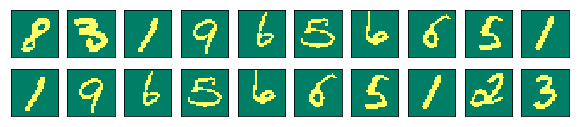

In [23]:
n=784 # number of qubits
m=20 # m images
data=np.load("mnist_100_28x28_p0.5.npy")
data=data[:m,:,:]
data=torch.LongTensor(data)
data=data.view(-1,784) # m images, each of which is reshaped into a vector of length 784
show_imgs(data,2,10,10,2)

### MPS initialization
Define the mps, which is a list of 3-way tensors containing random values 
<img src="mps.png" width="350px"/>

In [24]:
Dmax=30 # maximum bond dimension
bond_dims=[Dmax for i in range(n-1)]+[1]
tensors= [ torch.randn(bond_dims[i-1],2,bond_dims[i]) for i in range(n)]

Now check the bond dimensions and tensors

In [25]:
print("There are len(tensors) tensors")
print(bond_dims)
print(tensors[5].shape)

There are len(tensors) tensors
[30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 

Question: does the contration with one image give a probability of the image? Why?

Canonicalization using QR decompositions

In [26]:
def orthogonalize(site,going_right):
    dl=bond_dims[site-1] # left bond dimension
    d=bond_dims[site]   # current bond dimension
    if(going_right):
        A=tensors[site].view(dl*2,d) # A is a matrix unfolded from the current tensor
        Q,R=torch.qr(A)
        R/=R.norm() # devided by norm 
        tensors[site] = Q.contiguous().view(dl,2,-1)
        tensors[site+1] = (R@tensors[site+1].view(d,-1)).view(-1,2,bond_dims[site+1])
        bond_dims[site] = Q.shape[1] # economy QR, so the right dimension could be either dl or d
    else: # going left
        A=tensors[site].view(dl,d*2).t()
        Q,R=torch.qr(A)
        R/=R.norm() 
        tensors[site]=Q.t().contiguous().view(-1,2,d)
        tensors[site-1] = (tensors[site-1].view(-1,dl)@R.t()).view(bond_dims[site-2],2,-1)
        bond_dims[site-1] = Q.shape[1]


### MPS left canonicalization
Canonicalization gives several advantages.  
First, it make the partition function of the model equals to $1$.  
Second, the isometries have condition number $1$, preserving very well the computation precisions.
<img src="mps_left.png" width="350px"/>

In [27]:
for site in range(n-1):
    orthogonalize(site,True)     

In [28]:
tensors[783].shape

torch.Size([30, 2, 1])

Canonicalization changes the bond dimensions, to see it

In [10]:
print(bond_dims)

[2, 4, 8, 16, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30

Now contracting mps with one image gives the probability amplitude of the image.

In [29]:
def get_psi():
    psi=torch.ones([m,1,1])
    for site in range(n):
        psi = psi @ tensors[site][:,data[:,site],:].permute(1,0,2)
    return(psi)

In [30]:
def gen_samples(ns):
    samples=np.zeros([ns,n])
    for site in range(n-1):# left canonicalize
        orthogonalize(site,True) 
    for s in range(ns):
        vec=torch.ones(1,1)
        for site in range(n-1,-1,-1):
            vec = (tensors[site].view(-1,bond_dims[site])@vec).view(-1,2)
            p0 = vec[:,0].norm()**2/ (vec.norm()**2)
            x = (0 if np.random.rand() < p0 else 1)
            vec = vec[:,x]
            samples[s][site]=x
    return samples

### Initialize cache for MPS
Computing probability of a image consists of contracting bonds from the first tensor to the last tensor. Lots of computation results can be re-used in the future computations, so we would like to store the contraction results in the cache.
Notice that the cache is for all images.

In [31]:
cache=[] 
cache.append( torch.ones([m,1,1])) # The initial elements, all images have cache 1
for site in range(n-1):
    B=cache[site] @ tensors[site][:,data[:,site],:].permute(1,0,2)
    B /= B.abs().max()
    cache.append(  B  ) # batched matrix multiplications
cache.append( torch.ones(m,1,1)) # the last element, matrix [1,1] for all images

Length of the case is $n+1$. In the caceh, for an image, each pixel has a correponding vector, denoting the temporary results in tensor contractions (from left to right or from right to left).
Let us look at the content of cache for image alpha=1:

In [14]:
alpha=1 # the image 1
print("cache site 1 ",cache[0][alpha])
print("cache site 2 ",cache[1][alpha])
print("cache site 3 ",cache[2][alpha])

cache site 1  tensor([[ 1.]])
cache site 2  tensor([[-1.0000, -0.5231]])
cache site 3  tensor([[ 0.6791,  0.3302, -0.6933,  1.0000]])
cache site 4  tensor([[-0.6459,  0.2046, -1.0000, -0.5822, -0.5152,  0.2265,  0.3331,
         -0.2325]])
cache site 5  tensor([[-0.5622,  0.1972,  0.3345, -0.3117, -0.0213,  0.0545,  0.3118,
         -0.2166,  1.0000, -0.1798, -0.4201, -0.0843, -0.0838,  0.5389,
          0.0963,  0.2421]])
cache site 6  tensor([[-0.5622,  0.1972,  0.3345, -0.3117, -0.0213,  0.0545,  0.3118,
         -0.2166,  1.0000, -0.1798, -0.4201, -0.0843, -0.0838,  0.5389,
          0.0963,  0.2421]])


Then the probability amplitude $\psi$ for images can be obtained by

In [32]:
psi=get_psi()

Let us output the probablity for an image, which equals $|\psi|^2$ 

In [33]:
print("Probability of generating image 3 = %.5f"%(psi*psi)[3])

Probability of generating image 3 = 0.00000


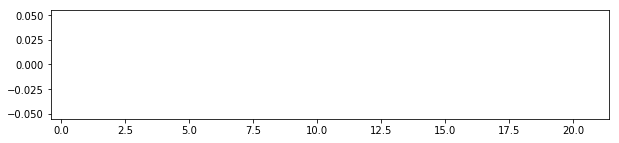

In [17]:
ax=plt.bar(range(1,psi.shape[0]+1),psi**2)

**Hey, the probability is $0$, what is wrong?**  

Because the space is too large and the model is randomly initialized!

Actually the purpose of training is exactly to increase the probability (or equivalently, log probability) of given images. This is the so-called *maximum likelihood learning*

The basic procedure is sweeping back and force, from right to left, then from left to right. During each sweep, the visited tensor is updated according to the *gradients* of the log-probability with respect to tensor elements.

## Training MPS
<img src="training.png" width="350px"/>

 Epoch #0, site #783 / 784           NLL=3.002, LowerBound=2.996   generating samples...

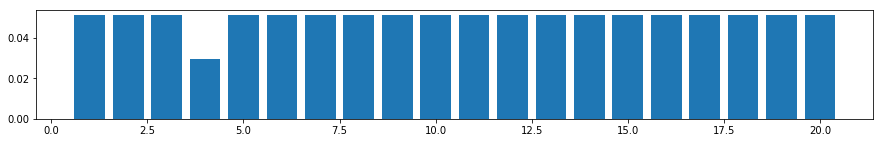

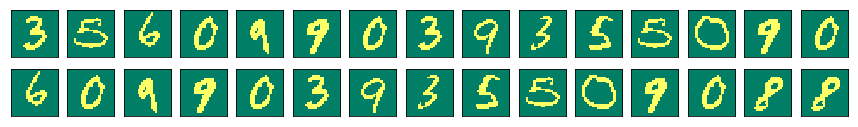

Press Enter to continue  
 Epoch #1, site #783 / 784           NLL=3.000, LowerBound=2.996   generating samples...

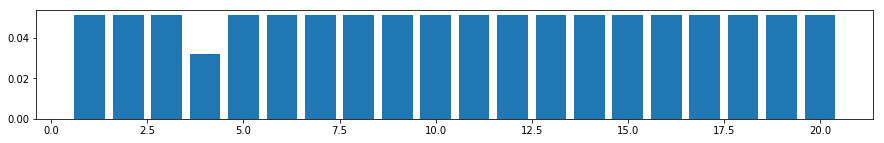

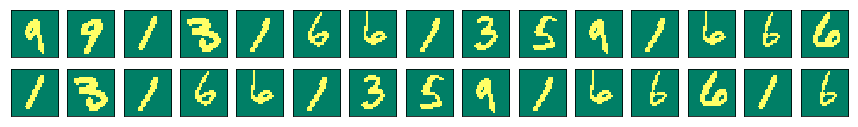

Press Enter to continue  
 Epoch #2, site #783 / 784           NLL=3.000, LowerBound=2.996   generating samples...

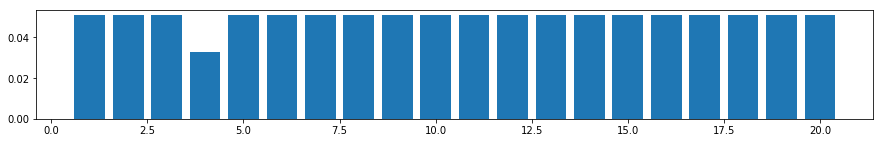

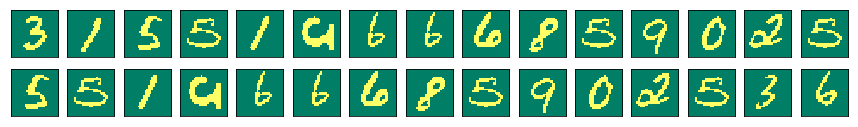

Press Enter to continue  
 Epoch #3, site #783 / 784           NLL=2.998, LowerBound=2.996   generating samples...

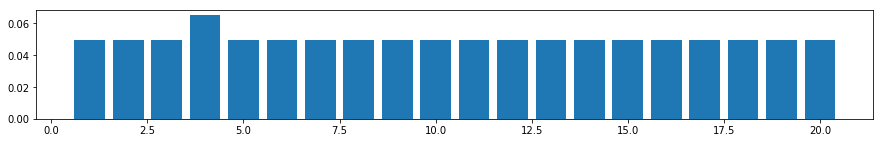

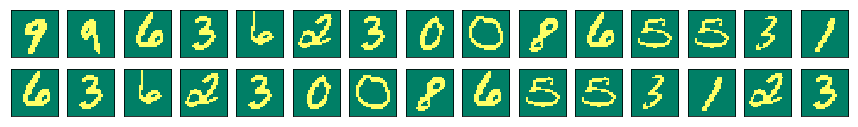

Press Enter to continue  
 Epoch #4, site #783 / 784           NLL=3.002, LowerBound=2.996   generating samples...

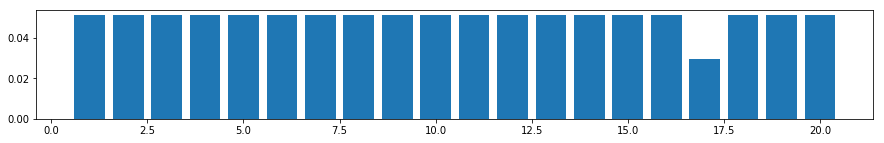

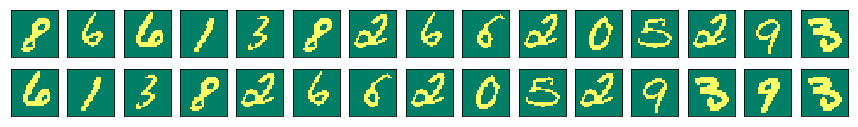

Press Enter to continue  
 Epoch #5, site #783 / 784           NLL=3.000, LowerBound=2.996   generating samples...

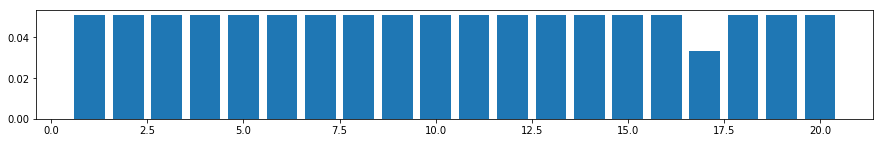

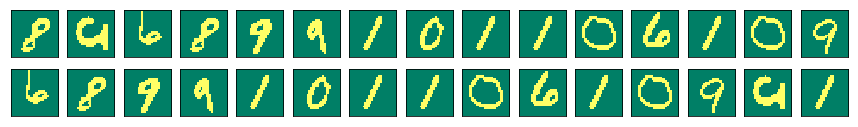

Press Enter to continue  
 Epoch #6, site #783 / 784           NLL=3.000, LowerBound=2.996   generating samples...

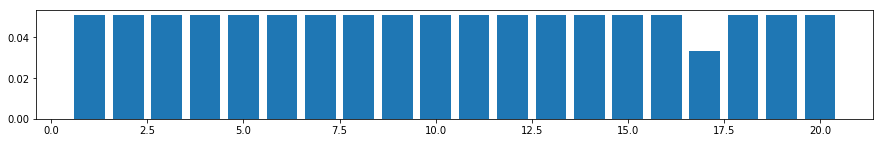

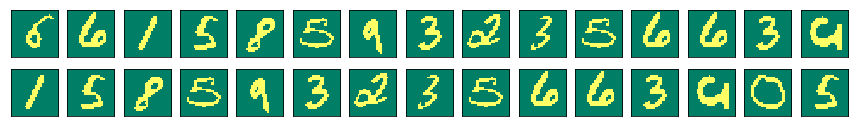

Press Enter to continue  
 Epoch #7, site #783 / 784           NLL=3.000, LowerBound=2.996   generating samples...

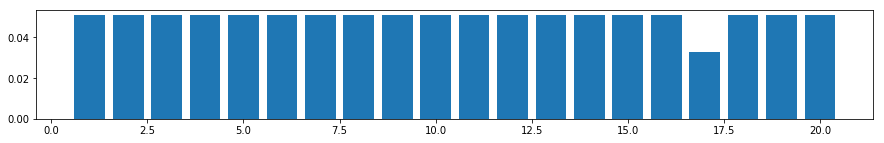

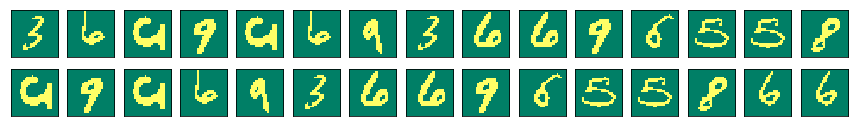

Press Enter to continue  
 Epoch #8, site #783 / 784           NLL=2.999, LowerBound=2.996   generating samples...

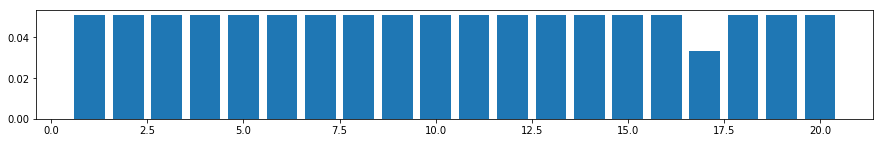

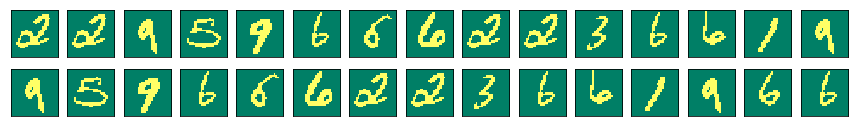

In [38]:
learning_rate=0.08
for epoch in range(9):    # one sweep, from right to left, then from left to right
    going_right=False
    for site in [i for i in range(n-1,0,-1)]+[i for i in range(n-1)]:
        # to update tensors[site] which is a 3-way tensor of size [dl,2,dr]
        sys.stdout.write("\r Epoch #%d, site #%d / %d           "%(epoch, site+1,n)); sys.stdout.flush()
        if(site==0): going_right=True
        gradients = torch.zeros_like(tensors[site])
        for i in [0,1]: # the pixel could be either 0 or 1
            idx=(data[:,site]==i).nonzero().type(torch.LongTensor).squeeze() # this returns indices of non-zero elements
            if(idx.numel()==0): continue
            left_vec = cache[site][idx,:,:] # a vector on the left of the site
            right_vec = cache[site+1][idx,:,:] # a vector on the right of the site
            A=tensors[site][:,data[idx,site],:]
            if(idx.numel()==1): 
                A=A.view(A.shape[0],1,A.shape[1])
                left_vec=left_vec.view(1,left_vec.shape[0],left_vec.shape[1])
                right_vec=right_vec.view(1,right_vec.shape[0],right_vec.shape[1])
            psi = left_vec @ A.permute(1,0,2) @right_vec # probability amplitude
            gradients[:,i,:] = torch.sum(left_vec.permute(0,2,1) @ right_vec.permute(0,2,1) / psi,0) 
        gradients = 2.0*(gradients/m-tensors[site])  
        tensors[site] += learning_rate * gradients/gradients.norm()
        orthogonalize(site,going_right)
        if(going_right):
            cache[site+1] = cache[site] @ tensors[site][:,data[:,site],:].permute(1,0,2)
            cache[site+1] /= cache[site+1].abs().max()
        else:
            cache[site] = tensors[site][:,data[:,site],:].permute(1,0,2) @ cache[site+1]
            cache[site] /= cache[site].abs().max()
    psi=get_psi()
    tensors_bak=tensors.copy()
    sys.stdout.write("NLL=%.3f, LowerBound=%.3f "%(-torch.mean(torch.log(psi*psi)),math.log(m)))
    sys.stdout.write("  generating samples...")
    ax=plt.bar(range(1,psi.shape[0]+1),psi**2)
    imgs=gen_samples(30)
    show_imgs(imgs,2,15,15,2)
    tensors=tensors_bak.copy()
    if(epoch < 8):
        input("Press Enter to continue  ")


### References for further reading:
* Ulrich Schollwock, “The density-matrix renormalization group in the age of matrix product states,” Annals of Physics 326, 96– 192 (2011).
* E. Miles Stoudenmire and David J. Schwab, “Supervised Learning with Quantum-Inspired Tensor Networks,” Advances in Neural Information Processing Systems 29, 4799 (2016), arXiv:1605.05775.
* Alexander Novikov, Mikhail Trofimov, and Ivan Oseledets, “Exponential machines,” arXiv:1605.05775 (2016).
* Ivan V Oseledets, “Tensor-train decomposition,” SIAM Journal on Scientific Computing 33, 2295–2317 (2011).
* Edwin Miles Stoudenmire, “Learning relevant features of data with multi-scale tensor networks,” Quantum Science and Technology (2018).